In [18]:
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')
import scipy.stats as stats
import pymc as pm

In [5]:
figsize(11, 9)

In [6]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

## 동전 던지기

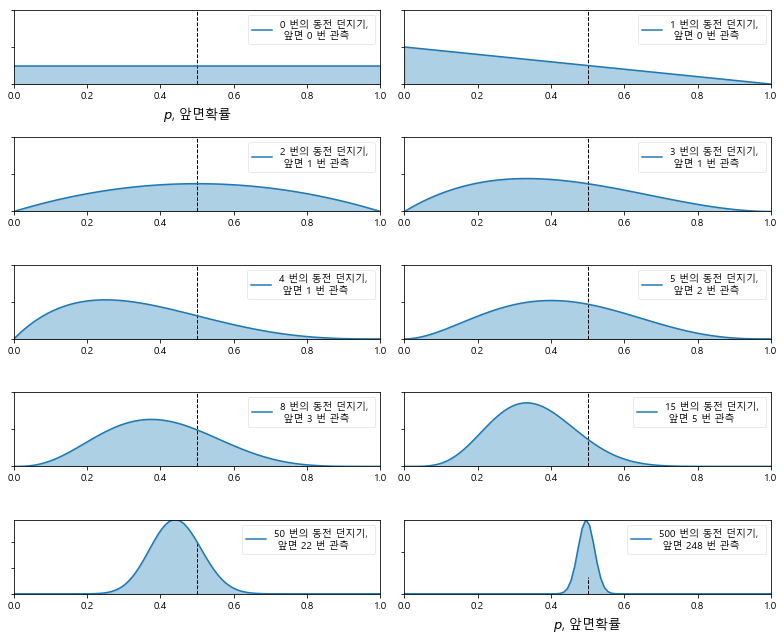

In [9]:
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k+1)
    plt.xlabel("$p$, 앞면확률", fontsize=13) if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d 번의 동전 던지기, \n 앞면 %d 번 관측" %(N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
plt.tight_layout()

## Poisson

In [10]:
figsize(12.5, 4)
a = np.arange(16)
poi = stats.poisson

In [12]:
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

Text(0.5, 0, '$k$')

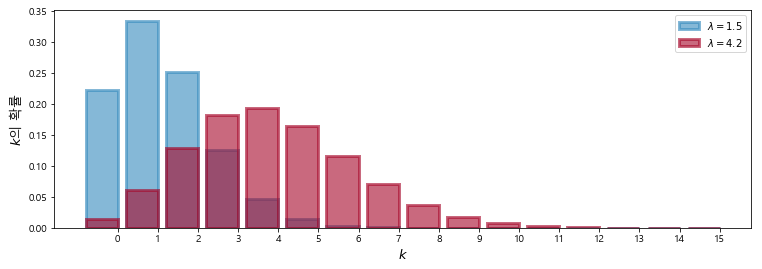

In [13]:
plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0], label="$\lambda = %.1f$" % lambda_[0], alpha=0.60, edgecolor=colours[0], lw="3")
plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1], label="$\lambda = %.1f$" % lambda_[1], alpha=0.60, edgecolor=colours[1], lw="3")
plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("$k$의 확률", fontsize=13)
plt.xlabel("$k$", fontsize=13)

## Exponential Distribution

In [14]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

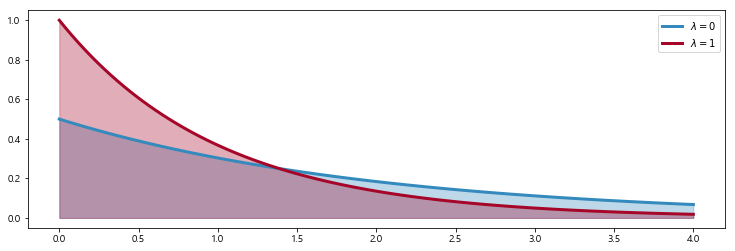

In [15]:
for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3, color=c, label="$\lambda=%1.f$" %l)
    plt.fill_between(a, expo.pdf(a, scale=1. /l), color=c, alpha=.33)
plt.legend()

## TxTdata

<BarContainer object of 74 artists>

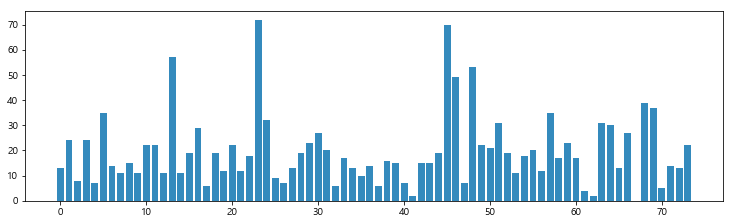

In [17]:
figsize(12.5, 3.5)
count_data = np.loadtxt("d:/data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")

# Probabilistic programming

In [20]:
# 변수
alpha = 1.0 / count_data.mean()
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)
tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In [21]:
print("Random Output:", tau.random(), tau.random(), tau.random())

Random Output: 53 73 14


In [22]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1
    out[tau:] = lambda_2
    return out

In [23]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True) # observed --> 결정
model = pm.Model([observation, lambda_1, lambda_2, tau])

In [24]:
# Markov Cahiin Monte Carlo
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

C:\Users\cutz3\.conda\envs\py36\lib\site-packages\pymc\MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 3.8 sec

C:\Users\cutz3\.conda\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\cutz3\.conda\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\cutz3\.conda\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


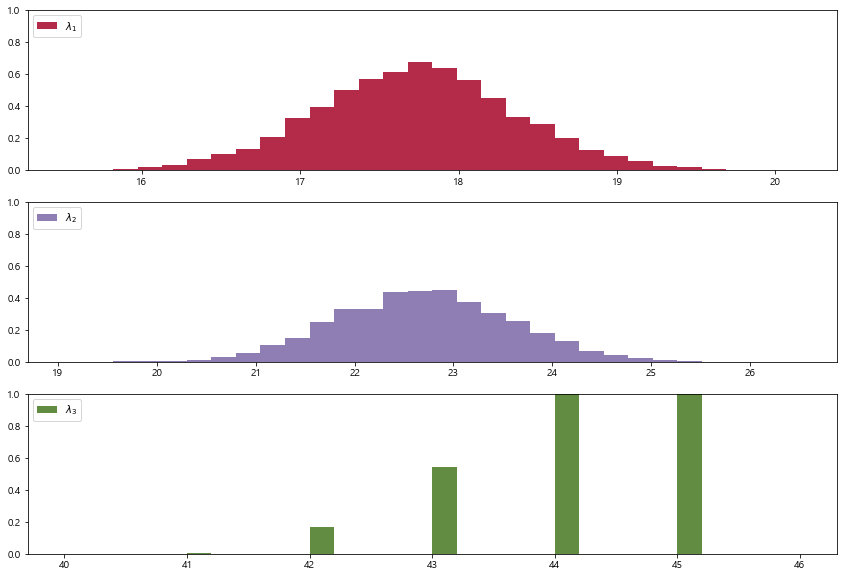

In [26]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

figsize(14.5, 10)
ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85, label="$\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85, label="$\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")

ax = plt.subplot(313)
ax.set_autoscaley_on(False)
plt.hist(tau_samples, histtype='stepfilled', bins=30, alpha=0.85, label="$\lambda_3$", color="#467821", normed=True)
plt.legend(loc="upper left")

[17.73677903 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903
 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903
 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903
 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903
 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903
 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903 17.73677903
 17.73677903 17.73677903 17.73677903 17.73677903 17.73733457 17.74195918
 17.88868616 18.39096904 20.22356232 22.70534428 22.70537952 22.70537952
 22.70537952 22.70537952 22.70537952 22.70537952 22.70537952 22.70537952
 22.70537952 22.70537952 22.70537952 22.70537952 22.70537952 22.70537952
 22.70537952 22.70537952 22.70537952 22.70537952 22.70537952 22.70537952
 22.70537952 22.70537952 22.70537952 22.70537952 22.70537952 22.70537952
 22.70537952 22.70537952]


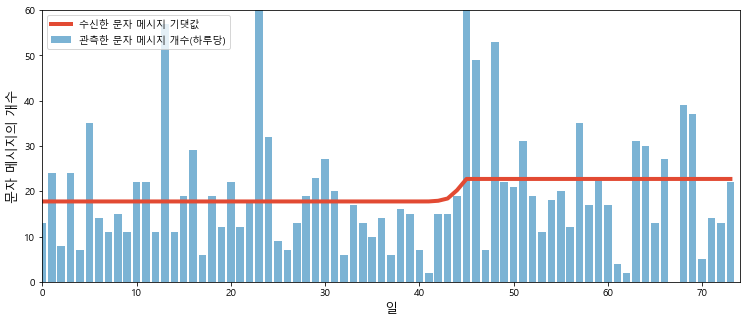

In [27]:

figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples은 
# 해당 사후확률분포에서 얻은 N 개의 표본은 가진다.
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data) # number of data points #데이터 포인트 수
for day in range(0, n_count_data):
    # ix 는'day'값이전에 발생한 스위치포인트(switchpoint)에 해당하는 
    # 모든 tau표본의 boolean 인덱스이다. 
    ix = day < tau_samples
    # 각 사후확률분포의 표본은 tau값에 해당한다. tau값은 스위치포인트 이전인지(lambda1)
    # 이후인지(lambda2)을 가리킨다
    # lambda1/2의 사후확률분포 표본을 취함으로써 우리는 모든 표본을 평균하여 그날의 
    # lambda 기대값을 얻을 수 있다.
    # 설명한 바와 같이 문자메시지 갯수 랜덤변수는 포아송분포를 따른다. 
    # 그러므로 lambda(포아송 모수)는 메시지갯수의 기대값이다.
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="수신한 문자 메시지 기댓값")
plt.xlim(0, n_count_data)
plt.xlabel("일", fontsize=13)
plt.ylabel("문자 메시지의 개수", fontsize=13)
#plt.title("수신한 문자메시지 기댓값")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="관측한 문자 메시지 개수(하루당)")

plt.legend(loc="upper left");
print (expected_texts_per_day)


## 변환점 확장

In [29]:
# 변수
alpha = 1.0 / count_data.mean()
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)
lambda_3 = pm.Exponential("lambda_3", alpha)
tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper=n_count_data)
tau_2 = pm.DiscreteUniform("tau_2", lower=0, upper=n_count_data)

@pm.deterministic
def lambda_(tau_1=tau_1, tau_2=tau_2, lambda_1=lambda_1, lambda_2=lambda_2, lambda_3=lambda_3):
    out = np.zeros(n_count_data)
    out[:tau_1] = lambda_1
    out[tau_1:tau_2] = lambda_2
    out[tau_2:] = lambda_3
    return out

observation = pm.Poisson('obs', lambda_, value=count_data, observed=True)
model = pm.Model([observation, lambda_1, lambda_2, lambda_3, tau_1, tau_2])
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

C:\Users\cutz3\.conda\envs\py36\lib\site-packages\pymc\MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 6.4 sec

# Quiz

In [30]:
# 1
print(lambda_1_samples.mean(), lambda_2_samples.mean())

17.736779025677084 22.70537951949385


In [33]:
# 2
test_sample = (lambda_2_samples - lambda_1_samples) / lambda_1_samples
test_sample.mean()

0.2817195042152714

In [37]:
# 3
prior_condition = 45
lambda_1_samples[tau_samples < prior_condition].mean()

17.724208550146738

In [41]:
lambda_1_samples.shape

(30000,)